In [1]:
import sys
sys.path.append("..")

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from egh_vlm.utils import load_hallusion_bench_dataset

## Analysis

In [2]:
folder_path = "../data/hallusion_bench"
file_name="hallusion_bench_long_answer_qwen3-vl-2b.json"

dataset = load_hallusion_bench_dataset(folder_path, file_name)
df = pd.DataFrame(dataset)
df.head()

Successfully load the Hallusion Bench dataset with: 500 samples.


,id,question,answer,image_path,category,subcategory,gt_answer,gt_answer_details,label
0,0,Is the top yellow line longer than the bottom ...,Yes. The top yellow line is longer than the bo...,../data/hallusion_bench\images/VD/illusion/3_1...,VD,illusion,0,The top yellow line is shorter than the bottom...,1
1,1,Is the top line shorter than the bottom line?,No. The top line is longer than the bottom line.,../data/hallusion_bench\images/VD/illusion/2_0...,VD,illusion,0,The top line is the same size as the bottom line.,0
2,2,"If BE ⊥ AC, CD ⊥ AB, AF ⊥ BC, then is M the ci...","Yes.\n\nExplanation: In a triangle, the circum...",../data/hallusion_bench\images/VD/math/12_1.png,VD,math,0,M is a random point inside of triangle ABC.,1
3,3,"According to the text given in the image, is t...","Yes. The text on the ice cream cup states ""Str...",../data/hallusion_bench\images/VD/ocr/16_1.png,VD,ocr,0,"No, this is ice-cream a strawberry flavor ice ...",1
4,4,Is the vertical line longer than the horizonta...,No. The vertical line is not longer than the h...,../data/hallusion_bench\images/VD/illusion/29_...,VD,illusion,0,"No, the lengths of the vertical line and the h...",0


In [3]:
gt_answers = df["gt_answer"].value_counts(normalize=True)
labels = df["label"].value_counts(normalize=True)
print(gt_answers)
print(labels)

gt_answer
0    0.5
1    0.5
Name: proportion, dtype: float64
label
0    0.66
1    0.34
Name: proportion, dtype: float64


answer lengths mean: 238.46
answer lengths median: 231.0
answer lengths q1: 137.75
answer lengths q3: 315.0


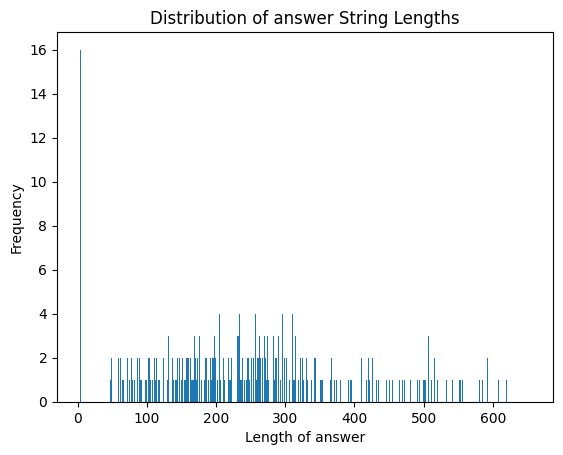

In [4]:
answer_lengths = [len(answer) for answer in  df["answer"]]
answer_lengths_count = Counter(answer_lengths)

print(f"answer lengths mean: {round(np.mean(answer_lengths), 2)}")
print(f"answer lengths median: {round(np.median(answer_lengths), 2)}")
print(f"answer lengths q1: {round(np.quantile(answer_lengths, 0.25), 2)}")
print(f"answer lengths q3: {round(np.quantile(answer_lengths, 0.75), 2)}")

plt.figure()
plt.bar(answer_lengths_count.keys(), answer_lengths_count.values())
plt.xlabel("Length of answer")
plt.ylabel("Frequency")
plt.title("Distribution of answer String Lengths")
plt.show()